In [2]:
#Import Dependencies
import pandas as pd
import numpy as np

#Import matplotlib dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

#File to load
file_path = "../Shadee/Data/alcsales_August2020_codedfullfile.csv"

# Read Purchasing File and store into Pandas data frame
alcohol_sales_data = pd.read_csv(file_path)
alcohol_sales_data['Month - Year (Date)'] = pd.to_datetime(alcohol_sales_data['Month - Year (Word)'])
alcohol_sales_data.head()


,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
1,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,January,January 2017,1 2017,2017-01-01
2,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,January,January 2017,1 2017,2017-01-01
3,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,January,January 2017,1 2017,2017-01-01
4,2017,1,10,1,180388,74139,799550,0.0927,Delaware,January,January 2017,1 2017,2017-01-01


In [3]:
month_date_alcohol_sales_groupby = alcohol_sales_data.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_avg_pop = month_date_alcohol_sales_groupby["Population"].mean()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

cleaned_month_date_alcohol_sales_groupby_df = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_avg_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

cleaned_month_date_alcohol_sales_groupby_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,213428134,17952672,5.841676e+06,0.057390
2017-02-01,202554024,17181353,5.841676e+06,0.056627
2017-03-01,234341479,19741824,5.841676e+06,0.066356
2017-04-01,242022452,19623984,5.841676e+06,0.065969
2017-05-01,253716538,20843786,5.841676e+06,0.071760


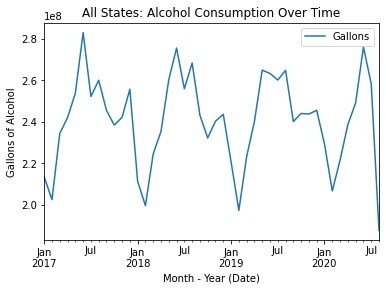

In [4]:
#Plot
cleaned_month_date_alcohol_sales_groupby_df.plot.line( y='Gallons', title="All States: Alcohol Consumption Over Time")
plt.ylabel('Gallons of Alcohol')

plt.savefig("allstates_alcohol_consumption.png")

#Need to increase size and add more ticks
#Also need to clean the data to remove any states that did not have data for all dates

In [5]:
#TEST SCRIPT - Calculate total number of data points per year
#Groupby
state_alcohol_sales_groupby = alcohol_sales_data.groupby(['State'])

#Find count of data point per state
count_per_state = state_alcohol_sales_groupby.size()
count_per_state.head()

State
Alaska         132
Arkansas       132
Colorado       132
Connecticut    129
Delaware       129
dtype: int64

In [6]:
# Count the total of screen names "SN" by age group and find sum of all
total_ethanol = state_alcohol_sales_groupby["Gallons"].sum()
total_ethanol.head()


State
Alaska          66763764
Arkansas       211641222
Colorado       562826422
Connecticut    270652431
Delaware       101224349
Name: Gallons, dtype: int64

In [7]:
total_population = state_alcohol_sales_groupby["Population"].sum()
total_population.head()

State
Alaska          77997828
Arkansas       325696704
Colorado       623966136
Connecticut    389340432
Delaware       104423427
Name: Population, dtype: int64

In [8]:
grouped_state_df = pd.DataFrame({
    "Count": count_per_state,
    "Gallons": total_ethanol,
    "Total Population": total_population
})

grouped_state_df

,Count,Gallons,Total Population
State,,,
Alaska,132,66763764,77997828
Arkansas,132,211641222,325696704
Colorado,132,562826422,623966136
Connecticut,129,270652431,389340432
Delaware,129,101224349,104423427
Florida,129,1963678488,2323138986
Illinois,132,1140012903,1389969696
Kansas,88,214345767,208149040
Kentucky,132,326617001,486159252


,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1031551,96155,593378,0.054000
2017-02-01,1129711,108795,593378,0.061133
2017-03-01,1453069,134456,593378,0.075533
2017-04-01,1367197,123712,593378,0.069500
2017-05-01,1841678,159711,593378,0.089733


In [12]:
# Load in COVID Data

inc_cases_per_100000 = "Data/New_cases_per_100000.csv"
inc_cases_per_100000_df = pd.read_csv(inc_cases_per_100000, encoding="ISO-8859-1") 
inc_cases_per_100000_df = inc_cases_per_100000_df.rename(columns={"ï»¿Month": "Month"})
inc_cases_per_100000_df.sample(10)
inc_cases_per_100000_df.head()

,Month,Alaska,Arkansas,Colorado,Connecticut,Delaware,Florida,Illinois,Kansas,Kentucky,Louisiana,Massachusetts,Missouri,North Dakota,Tennessee,Texas,Utah,Virginia,Wisconsin
0,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-01,3.6,4.2,10.4,13.2,6.3,5.1,8.4,2.5,2.4,20.3,16.1,3.4,3.3,6.1,2.0,5.5,2.9,4.9
2,2020-04-01,34.1,54.5,141.9,423.2,229.6,96.4,202.7,60.2,53.1,428.3,457.1,75.1,61.5,86.1,52.6,81.5,89.3,63.1
3,2020-05-01,16.2,101.9,217.7,580.7,533.9,107.1,506.1,199.4,110.9,287.6,735.5,95.1,179.7,163.7,104.5,138.4,266.2,144.7
4,2020-06-01,38.9,283.6,143.3,243.7,306.6,191.8,338.6,138.7,120.6,291.3,321.9,99.5,162.9,213.6,185.5,262.3,290.5,217.8


In [19]:
#Alaska only
alaska_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == 'Alaska']

#Groupby year
alaska_by_year = alaska_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
alaska_total_gallons = alaska_by_year["Gallons"].sum()

# Find sum of ethanol
alaska_total_ethanol = alaska_by_year["Ethanol"].sum()

# Find average of population
alaska_avg_pop = alaska_by_year["Population"].mean()

# Find average pc
alaska_avg_pc = alaska_by_year["PerCapita"].mean()

cleaned_alaska_df = pd.DataFrame({
    "Gallons": alaska_total_gallons,
    "Ethanol": alaska_total_ethanol,
    "Population": alaska_avg_pop,
    "PerCapita": alaska_avg_pc
    
})

cleaned_alaska_df.head()

alaska_cases_df = inc_cases_per_100000_df[['Month','Alaska']]
alaska_cases_df

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,1031551,96155,593378,0.054000
2017-02-01,1129711,108795,593378,0.061133
2017-03-01,1453069,134456,593378,0.075533
2017-04-01,1367197,123712,593378,0.069500
2017-05-01,1841678,159711,593378,0.089733
